In [52]:
#Reading in the files and merging the data
import pandas as pd
whole_dataset = []
for person in range(1, 26):
    df = pd.read_csv('Dataset/' + str(person) + '.csv')
    whole_dataset.append(df)

whole_dataset = pd.concat(whole_dataset)

#Saving the merged data into a CSV
whole_dataset.to_csv('Dataset/total_persons_initial_info.csv', index = False)

In [53]:
#Reading the CSV back into a dataframe
df = pd.read_csv('Dataset/total_persons_initial_info.csv')

#Separating the rows which are "Alert" only
df_alert = df[df["Label"] == 0] 
print(df_alert)

       Person       EAR       MAR       PUC       MOE  Label
0           1  0.292079  0.391358  0.443185  1.339904      0
1           1  0.350000  0.417129  0.499206  1.191797      0
2           1  0.341971  0.432854  0.414329  1.265763      0
3           1  0.309173  0.446435  0.466982  1.443964      0
4           1  0.250000  0.446435  0.415441  1.785741      0
...       ...       ...       ...       ...       ...    ...
11755      25  0.258065  0.354103  0.422744  1.372147      0
11756      25  0.260234  0.608817  0.296206  2.339501      0
11757      25  0.257458  0.356739  0.368379  1.385621      0
11758      25  0.207973  0.349929  0.354302  1.682571      0
11759      25  0.251296  0.367350  0.412851  1.461825      0

[6000 rows x 6 columns]


In [54]:
#Creating separate dataframes for each person's first, second and third "Alert" frame
df_alert_1 = df_alert.iloc[0::240, :]
df_alert_2 = df_alert.iloc[1::240, :]
df_alert_3 = df_alert.iloc[2::240, :]
print(df_alert_1)
print(df_alert_2)
print(df_alert_3)

       Person       EAR       MAR       PUC       MOE  Label
0           1  0.292079  0.391358  0.443185  1.339904      0
480         2  0.237788  0.429073  0.396446  1.804433      0
960         3  0.264679  0.392612  0.456072  1.483349      0
1440        4  0.293183  0.392336  0.459712  1.338197      0
1920        5  0.273502  0.186906  0.459583  0.683380      0
2400        6  0.278163  0.221327  0.454315  0.795672      0
2880        7  0.337310  0.385400  0.455003  1.142567      0
3360        8  0.328398  0.302990  0.484770  0.922629      0
3840        9  0.292199  0.386776  0.433830  1.323673      0
4320       10  0.261778  0.325954  0.397949  1.245155      0
4800       11  0.349191  0.358900  0.478693  1.027803      0
5280       12  0.273873  0.335153  0.435574  1.223753      0
5760       13  0.318036  0.335460  0.437016  1.054788      0
6240       14  0.279189  0.408668  0.419553  1.463766      0
6720       15  0.250907  0.341404  0.391955  1.360681      0
7200       16  0.253696 

In [55]:
#Merging them into one dataframe
alert_first3 = [df_alert_1,df_alert_2,df_alert_3]
df_alert_first3 = pd.concat(alert_first3)
df_alert_first3 = df_alert_first3.sort_index()
print(df_alert_first3)

       Person       EAR       MAR       PUC       MOE  Label
0           1  0.292079  0.391358  0.443185  1.339904      0
1           1  0.350000  0.417129  0.499206  1.191797      0
2           1  0.341971  0.432854  0.414329  1.265763      0
480         2  0.237788  0.429073  0.396446  1.804433      0
481         2  0.298348  0.337879  0.464853  1.132502      0
...       ...       ...       ...       ...       ...    ...
11041      24  0.402480  0.408031  0.567687  1.013791      0
11042      24  0.377335  0.397222  0.538695  1.052702      0
11520      25  0.257930  0.367220  0.417689  1.423716      0
11521      25  0.274627  0.409280  0.366795  1.490314      0
11522      25  0.250898  0.361492  0.402140  1.440790      0

[75 rows x 6 columns]


# Mean = 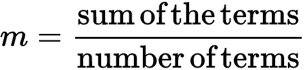
# Standard Deviation = 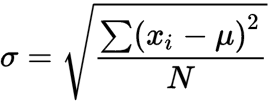

In [56]:
#Based on the first 3 "Alert" frames, calculating person-wise mean and std for each feature
df_means = df_alert_first3.groupby("Person")[["EAR","MAR","PUC","MOE"]].mean()
df_std = df_alert_first3.groupby("Person")[["EAR","MAR","PUC","MOE"]].std() 
print(df_means)
print(df_std)

             EAR       MAR       PUC       MOE
Person                                        
1       0.328017  0.413781  0.452240  1.265822
2       0.266214  0.384823  0.422197  1.471054
3       0.269715  0.391078  0.454566  1.450278
4       0.290814  0.392402  0.449141  1.349741
5       0.277838  0.182690  0.450161  0.657897
6       0.280088  0.239204  0.426765  0.855179
7       0.345302  0.392797  0.469180  1.138782
8       0.325524  0.313480  0.492991  0.963200
9       0.284444  0.418339  0.427660  1.472735
10      0.258255  0.340455  0.403910  1.320739
11      0.341210  0.366224  0.480028  1.073959
12      0.275382  0.339398  0.430227  1.232553
13      0.315111  0.326553  0.457173  1.045465
14      0.272862  0.405063  0.408941  1.484954
15      0.255679  0.341023  0.402691  1.342772
16      0.266296  0.458047  0.403639  1.723450
17      0.290734  0.381106  0.457038  1.331062
18      0.271759  0.433576  0.419835  1.610247
19      0.325715  0.299080  0.485709  0.919393
20      0.338

In [57]:
#Functions for mean and std for each feature
def mean_EAR(person):
    return df_means.loc[person]["EAR"]

def mean_MAR(person):
    return df_means.loc[person]["MAR"]

def mean_PUC(person):
    return df_means.loc[person]["PUC"]

def mean_MOE(person):
    return df_means.loc[person]["MOE"]


def std_EAR(person):
    return df_std.loc[person]["EAR"]

def std_MAR(person):
    return df_std.loc[person]["MAR"]

def std_PUC(person):
    return df_std.loc[person]["PUC"]

def std_MOE(person):
    return df_std.loc[person]["MOE"]

In [58]:
#Adding person-wise mean and std for each feature to each row in the original dataframe
df["EAR_mean"] = df["Person"].apply(mean_EAR)
df["MAR_mean"] = df["Person"].apply(mean_MAR)
df["PUC_mean"] = df["Person"].apply(mean_PUC)
df["MOE_mean"] = df["Person"].apply(mean_MOE)

df["EAR_std"] = df["Person"].apply(std_EAR)
df["MAR_std"] = df["Person"].apply(std_MAR)
df["PUC_std"] = df["Person"].apply(std_PUC)
df["MOE_std"] = df["Person"].apply(std_MOE)

In [59]:
#Calculating normalised features for each row in the original dataframe
df["EAR_N"] = (df["EAR"]-df["EAR_mean"])/ df["EAR_std"]
df["MAR_N"] = (df["MAR"]-df["MAR_mean"])/ df["MAR_std"]
df["PUC_N"] = (df["PUC"]-df["PUC_mean"])/ df["PUC_std"]
df["MOE_N"] = (df["MOE"]-df["MOE_mean"])/ df["MOE_std"]


In [60]:
# Reordering the columns
cols = df.columns.tolist()
cols = cols[:5] + cols[6:] + cols[5:6]
print(cols)
df = df[cols]

['Person', 'EAR', 'MAR', 'PUC', 'MOE', 'EAR_mean', 'MAR_mean', 'PUC_mean', 'MOE_mean', 'EAR_std', 'MAR_std', 'PUC_std', 'MOE_std', 'EAR_N', 'MAR_N', 'PUC_N', 'MOE_N', 'Label']


In [61]:
#Saving the file to a CSV with all the information
df.to_csv('Dataset/total_persons_all_info.csv',index=False)

In [62]:
#Saving the file to a CSV with only normalized the information
df_main = df.drop(["EAR_mean","MAR_mean","PUC_mean","MOE_mean","EAR_std","MAR_std","PUC_std","MOE_std"],axis=1)
df_main.to_csv('Dataset/total_persons_main_info.csv',index=False)